In [2]:
# mount goole drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
#import pandas, numpy, matplotlib, scipy
import pandas as pd 
import numpy as np  
import seaborn as sns
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as spy
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
#import and view head of data set
raw_crime = pd.read_csv("/gdrive/Shared drives/DATA 0200 Project Group/Data/ucr_crime_1975_2015.csv")  

In [5]:
#drops columns: source, url, and ORI (department code)
raw_crime = raw_crime.drop(columns =["source","url","ORI"])

In [6]:
#describe months_reported column
raw_crime['months_reported'].describe()

count    2692.000000
mean       11.868871
std         1.118194
min         0.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: months_reported, dtype: float64

In [7]:
#view months_reported column
raw_crime['months_reported'].value_counts()

12.0    2639
0.0       18
11.0       9
10.0       7
8.0        4
9.0        3
6.0        3
5.0        3
3.0        2
4.0        2
7.0        1
1.0        1
Name: months_reported, dtype: int64

In [8]:
#check the number of null values in months_reported column
print('missing - months_reported')
print(sum(pd.isnull(raw_crime['months_reported'])))
print('missing - year')
print(sum(pd.isnull(raw_crime['year'])))  
print('missing -  department_name ')
print(sum(pd.isnull(raw_crime['department_name']))) 
print('missing - total_pop')
print(sum(pd.isnull(raw_crime['total_pop']))) 
print('missing - homs_sum')
print(sum(pd.isnull(raw_crime['homs_sum']))) 
print('missing - rape_sum')
print(sum(pd.isnull(raw_crime['rape_sum'])))  
print('missing - rob_sum')
print(sum(pd.isnull(raw_crime['rob_sum']))) 
print('missing - agg_ass_sum')
print(sum(pd.isnull(raw_crime['agg_ass_sum'])))  
print('missing - violent_crime')
print(sum(pd.isnull(raw_crime['violent_crime']))) 
print('missing - violent_per_100k')
print(sum(pd.isnull(raw_crime['violent_per_100k']))) 
print('missing - homs_per_100k ')
print(sum(pd.isnull(raw_crime['homs_per_100k'])))  
print('missing -rape_per_100k ')
print(sum(pd.isnull(raw_crime['rape_per_100k'])))  
print('missing - rob_per_100k')
print(sum(pd.isnull(raw_crime['rob_per_100k'])))  
print('missing - agg_ass_per_100k')
print(sum(pd.isnull(raw_crime['agg_ass_per_100k']))) 

missing - months_reported
137
missing - year
0
missing -  department_name 
0
missing - total_pop
69
missing - homs_sum
34
missing - rape_sum
75
missing - rob_sum
75
missing - agg_ass_sum
76
missing - violent_crime
35
missing - violent_per_100k
35
missing - homs_per_100k 
34
missing -rape_per_100k 
75
missing - rob_per_100k
75
missing - agg_ass_per_100k
76


In [9]:
#filter and only keep non null values in months_reported column
raw_crime[raw_crime.months_reported.notnull()]

,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k
0,1975,"Albuquerque, N.M.",286238.0,30.0,181.0,819.0,1353.0,2383.0,12.0,832.523984,10.480789,63.234092,286.125532,472.683571
1,1975,"Arlington, Texas",112478.0,5.0,28.0,113.0,132.0,278.0,12.0,247.159445,4.445314,24.893757,100.464091,117.356283
2,1975,Atlanta,490584.0,185.0,443.0,3887.0,3518.0,8033.0,12.0,1637.436198,37.710158,90.300540,792.320989,717.104512
3,1975,"Aurora, Colo.",116656.0,7.0,44.0,171.0,389.0,611.0,12.0,523.762173,6.000549,37.717734,146.584831,333.459059
4,1975,"Austin, Texas",300400.0,33.0,190.0,529.0,463.0,1215.0,12.0,404.460719,10.985353,63.249001,176.098535,154.127830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,2014,"Tucson, Ariz.",527328.0,35.0,399.0,988.0,2021.0,3443.0,12.0,652.914315,6.637235,75.664482,187.359670,383.252928
2756,2014,"Tulsa, Okla.",399556.0,46.0,313.0,920.0,1938.0,3217.0,12.0,805.143710,11.512779,78.336954,230.255584,485.038393
2757,2014,"Virginia Beach, Va.",451102.0,17.0,115.0,250.0,285.0,667.0,12.0,147.860129,3.768549,25.493126,55.419839,63.178616
2758,2014,"Washington, D.C.",658893.0,105.0,470.0,3231.0,4004.0,7810.0,12.0,1185.321441,15.935820,71.331764,490.367935,607.685922


In [10]:
#filter by months_reported column and only keep rows with a months_reported value == 12
raw_crime = raw_crime[raw_crime['months_reported'].apply(lambda x: x == 12)]

In [11]:
#describe months_reported column
raw_crime['months_reported'].describe()

count    2639.0
mean       12.0
std         0.0
min        12.0
25%        12.0
50%        12.0
75%        12.0
max        12.0
Name: months_reported, dtype: float64

In [12]:
#convert department_name column data type object to a string 
raw_crime['department_name'] = raw_crime['department_name'].astype(str)
raw_crime.dtypes  

year                  int64
department_name      object
total_pop           float64
homs_sum            float64
rape_sum            float64
rob_sum             float64
agg_ass_sum         float64
violent_crime       float64
months_reported     float64
violent_per_100k    float64
homs_per_100k       float64
rape_per_100k       float64
rob_per_100k        float64
agg_ass_per_100k    float64
dtype: object

In [13]:
#desrcibe variables in raw_crime dataframe
raw_crime.describe() 

,year,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k
count,2639.000000,2.639000e+03,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.0,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000
mean,1994.592649,7.904620e+05,126.420614,417.714286,4070.858659,4454.654036,9069.647594,12.0,1117.090920,15.671346,59.830256,467.769958,573.819360
std,11.590124,1.017433e+06,205.891515,481.145226,8803.436258,7062.971963,16099.898571,0.0,677.255898,12.384022,31.701939,341.859030,369.305855
min,1975.000000,1.007630e+05,1.000000,15.000000,83.000000,15.000000,154.000000,12.0,16.494563,0.205464,1.640771,11.460508,1.606613
25%,1985.000000,3.767000e+05,32.000000,180.000000,1051.000000,1500.000000,3075.000000,12.0,647.433683,7.274072,36.334546,219.293611,326.112025
50%,1995.000000,5.291210e+05,63.000000,292.000000,1994.000000,2636.000000,5130.000000,12.0,977.460485,12.415923,56.393464,381.059010,493.608068
75%,2005.000000,8.002355e+05,128.000000,465.000000,3655.500000,4579.000000,8846.500000,12.0,1433.180341,20.510205,78.045808,619.552488,732.470307
max,2014.000000,8.473938e+06,2245.000000,3899.000000,107475.000000,71030.000000,174542.000000,12.0,4352.834209,94.735602,199.301908,2337.518708,2368.216602


In [14]:
#convert raw_crime (aka full pre-processed data) dataframe to a csv file, download csv file
raw_crime.to_csv('crime.csv') 
from google.colab import files
files.download('crime.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Exploratory Data Analysis**

In [15]:
#splits raw_crime into groups by year and names the this crime_grouped
crime_grouped = raw_crime.groupby('year')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


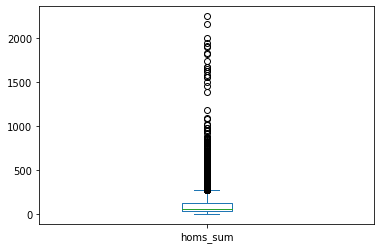

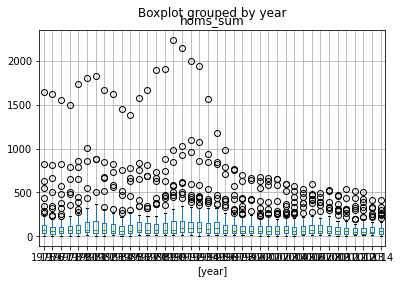

In [16]:
#Figure 1, creates a univariate boxplot for total homicides
raw_crime['homs_sum'].plot(kind='box') 
raw_crime[['year','homs_sum']].boxplot(by='year')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


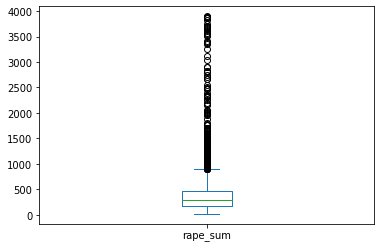

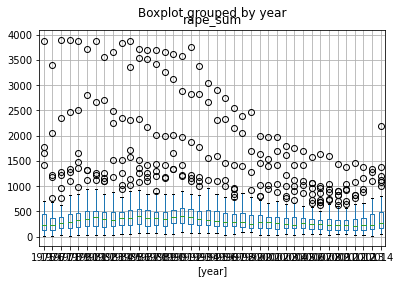

In [17]:
#figure 2, creates a univariate boxplot for total rape
raw_crime['rape_sum'].plot(kind='box') 
raw_crime[['year','rape_sum']].boxplot(by='year')



/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


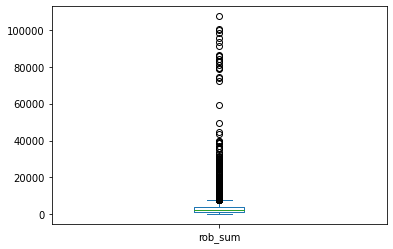

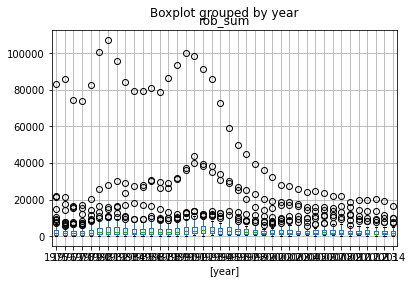

In [18]:
#figure 3, creates a univariate boxplot for total robbery
raw_crime['rob_sum'].plot(kind='box')
raw_crime[['year','rob_sum']].boxplot(by='year')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


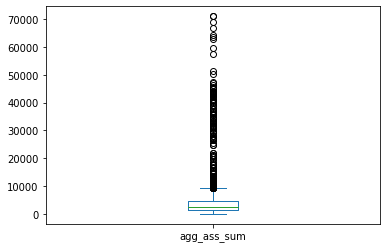

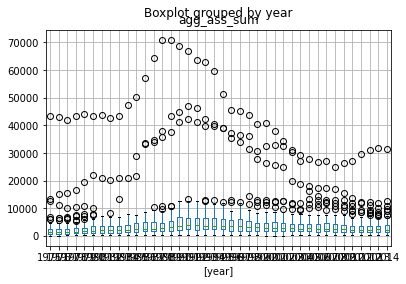

In [19]:
#figure 4, creates a univariate boxplot for total aggrevated assault
raw_crime['agg_ass_sum'].plot(kind='box')
raw_crime[['year','agg_ass_sum']].boxplot(by='year')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


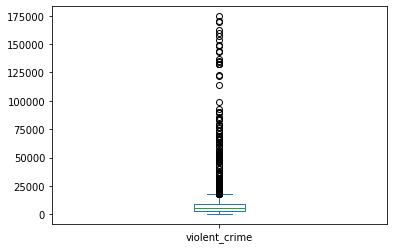

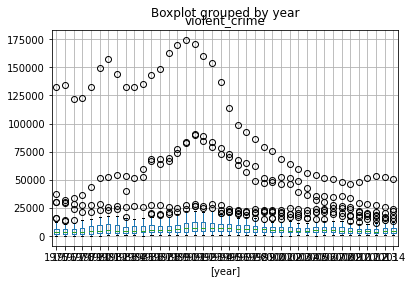

In [20]:
#figure 5, creates a univariate boxplot for total violent crime
raw_crime['violent_crime'].plot(kind='box')
raw_crime[['year','violent_crime']].boxplot(by='year')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


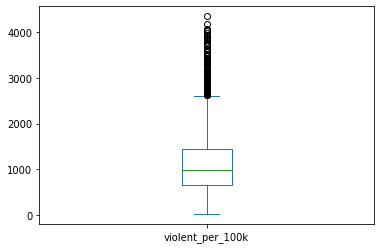

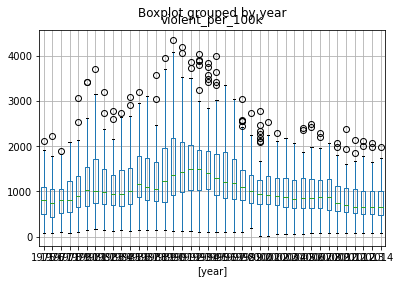

In [21]:
#figure 6, creates a univariate boxplot for violent crime per 100k
raw_crime['violent_per_100k'].plot(kind='box')
raw_crime[['year','violent_per_100k']].boxplot(by='year')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


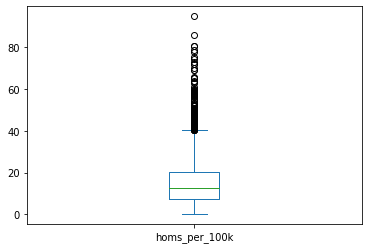

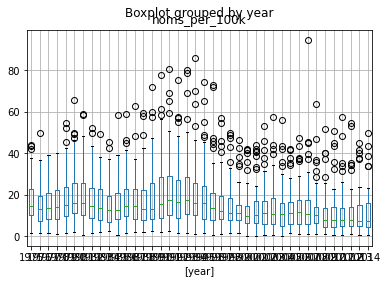

In [22]:
#figure 7, creates a univariate boxplot for homocides per 100k
raw_crime['homs_per_100k'].plot(kind='box')
raw_crime[['year','homs_per_100k']].boxplot(by='year')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


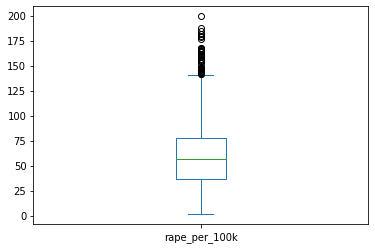

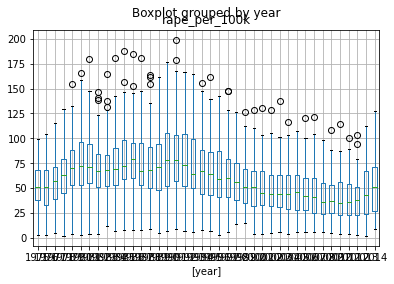

In [23]:
#figure 8, creates a univariate boxplot for rape per 100k
raw_crime['rape_per_100k'].plot(kind='box')
raw_crime[['year','rape_per_100k']].boxplot(by='year')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


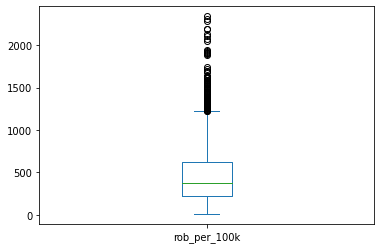

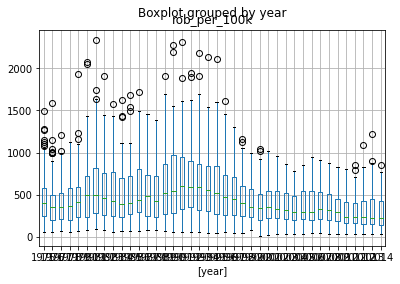

In [24]:
#figure 9, creates a univariate boxplot for robbery per 100k
raw_crime['rob_per_100k'].plot(kind='box')
raw_crime[['year','rob_per_100k']].boxplot(by='year')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


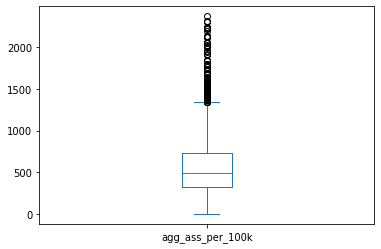

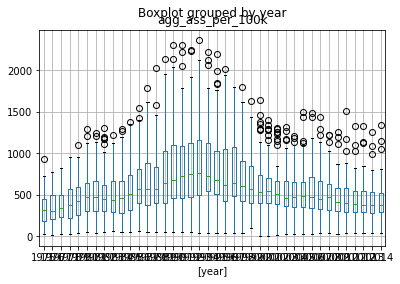

In [25]:
#figure 10, creates a univariate boxplot for aggrevated assault per 100k
raw_crime['agg_ass_per_100k'].plot(kind='box')
raw_crime[['year','agg_ass_per_100k']].boxplot(by='year')
# groupby year 
#take the average of year for all cites (for each caterogry) 
#cluster cities by population crompare different cateogres

-0.09880490053265416

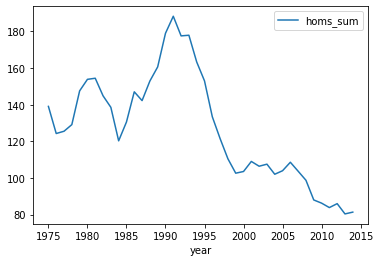

In [26]:
#figure 11, creates a bivariate scatterplot with year as the x axis and y as total homocides
raw_crime.groupby('year')['homs_sum'].mean().plot(legend=True)
#correlates the continuous variables for `Year' and 'homs_sum' and calculates the correlation coffiecent(r)
correlation_matrix = np.corrcoef(raw_crime['year'],raw_crime['homs_sum'] )
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
correlation_xy

-0.1144335769081617

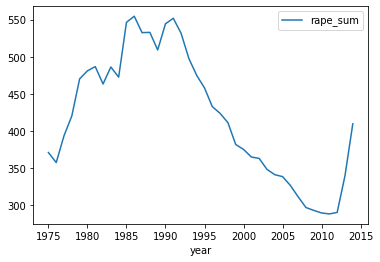

In [27]:
#figure 12, creates a bivariate scatterplot with year as the x axis and y as total rape
raw_crime.groupby('year')['rape_sum'].mean().plot(legend=True)
#correlates the continuous variables for `Year' and 'rame_sum' and calculates the correlation coffiecent(r)
correlation_matrix = np.corrcoef(raw_crime['year'], raw_crime['rape_sum'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
correlation_xy

-0.09056315362431748

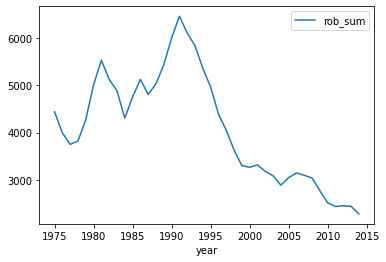

In [28]:
#figure 13, creates a bivariate scatterplot with year as the x axis and y as total robbery
raw_crime.groupby('year')['rob_sum'].mean().plot(legend=True)
#correlates the continuous variables for `Year' and 'rob_sum' and calculates the correlation coffiecent(r)
correlation_matrix = np.corrcoef(raw_crime['year'], raw_crime['rob_sum'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
correlation_xy

0.016166701006898456

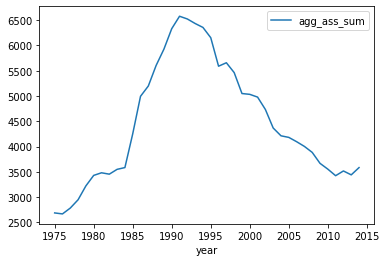

In [29]:
#figure 14, creates a bivariate scatterplot with year as the x axis and y as total aggrevated assault
raw_crime.groupby('year')['agg_ass_sum'].mean().plot(legend=True)
#correlates the continuous variables for `Year' and 'agg_ass_sum' and calculates the correlation coffiecent(r)
correlation_matrix = np.corrcoef(raw_crime['year'], raw_crime['agg_ass_sum'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
correlation_xy

-0.04711112003596619

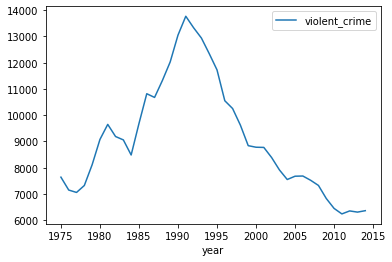

In [30]:
#figure 15, creates a bivariate scatterplot with year as the x axis and y as total violent crimes
raw_crime.groupby('year')['violent_crime'].mean().plot(legend=True)
#correlates the continuous variables for `Year' and 'violent_crime' and calculates the correlation coffiecent(r)
correlation_matrix = np.corrcoef(raw_crime['year'], raw_crime['violent_crime'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
correlation_xy

-0.12405300095056737

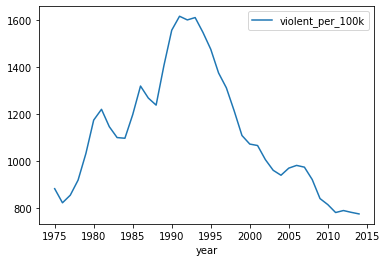

In [31]:
#figure 16, creates a bivariate scatterplot with year as the x axis and y as violent crime per 100k
raw_crime.groupby('year')['violent_per_100k'].mean().plot(legend=True)
#correlates the continuous variables for `Year' and 'violent_per_100k' and calculates the correlation coffiecent(r)
correlation_matrix = np.corrcoef(raw_crime['year'], raw_crime['violent_per_100k'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
correlation_xy

-0.16156892322529362

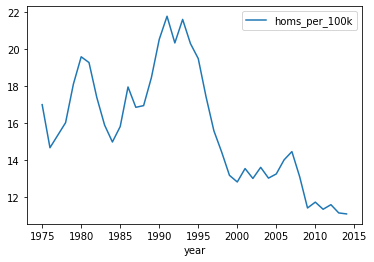

In [32]:
#figure 17, creates a bivariate scatterplot with year as the x axis and y as homocides per 100k
raw_crime.groupby('year')['homs_per_100k'].mean().plot(legend=True)
#correlates the continuous variables for `Year' and 'homs_per_100k' and calculates the correlation coffiecent(r)
correlation_matrix = np.corrcoef(raw_crime['year'], raw_crime['homs_per_100k'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
correlation_xy

-0.30800246672866904

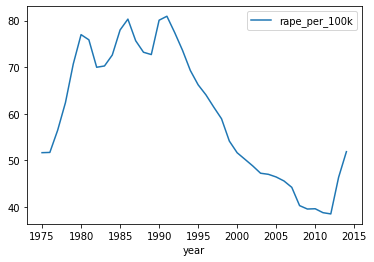

In [33]:
#figure 18, creates a bivariate scatterplot with year as the x axis and y as rape per 100k
raw_crime.groupby('year')['rape_per_100k'].mean().plot(legend=True)
#correlates the continuous variables for `Year' and 'rape_per_100k' and calculates the correlation coffiecent(r)
correlation_matrix = np.corrcoef(raw_crime['year'], raw_crime['rape_per_100k'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
correlation_xy

-0.21957781346057556

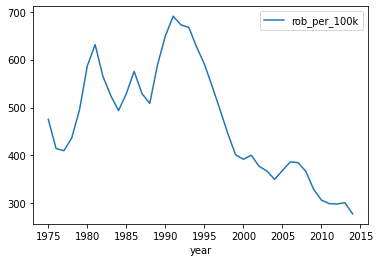

In [34]:
#figure 19, creates a bivariate scatterplot with year as the x axis and y as robbery per 100k
raw_crime.groupby('year')['rob_per_100k'].mean().plot(legend=True)
#correlates the continuous variables for `Year' and 'rob_per_100k' and calculates the correlation coffiecent(r)
correlation_matrix = np.corrcoef(raw_crime['year'], raw_crime['rob_per_100k'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
correlation_xy


0.007620189088226119

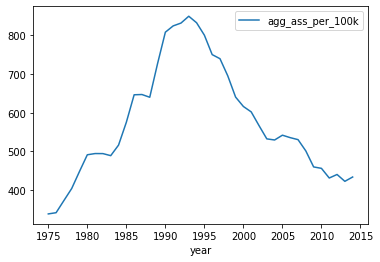

In [35]:
#figure 20, creates a bivariate scatterplot with year as the x axis and y as aggrevated assault per 100k
raw_crime.groupby('year')['agg_ass_per_100k'].mean().plot(legend=True)
#correlates the continuous variables for `Year' and 'agg_ass_per_100k' and calculates the correlation coffiecent(r)
correlation_matrix = np.corrcoef(raw_crime['year'], raw_crime['agg_ass_per_100k'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
correlation_xy


## **Kmeans Cluster**

In [36]:
#Creates three different datasets (based on year) for use in Kmeans Cluster
raw_crime.reset_index(drop=True, inplace=True)
crime_1975 = raw_crime[(raw_crime.year == 1975)][['department_name','homs_per_100k','total_pop']].copy()  
crime_1995 = raw_crime[(raw_crime.year == 1995)][['department_name','homs_per_100k','total_pop']].copy()  
crime_2014 = raw_crime[(raw_crime.year == 2014)][['department_name','homs_per_100k','total_pop']].copy()   
#shows raw_crime first 5 rows
crime_1975.head(5)   

,department_name,homs_per_100k,total_pop
0,"Albuquerque, N.M.",10.480789,286238.0
1,"Arlington, Texas",4.445314,112478.0
2,Atlanta,37.710158,490584.0
3,"Aurora, Colo.",6.000549,116656.0
4,"Austin, Texas",10.985353,300400.0


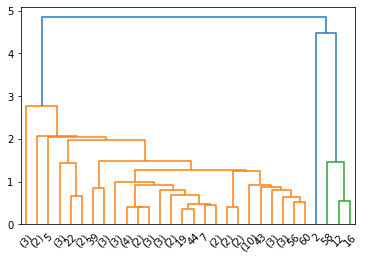

In [37]:
#1975  
#drops 'department_name and total_pop' column and produces a "linkage_matrix" and dendrogram from 1995 data
dncrime_1975 = crime_1975.drop(columns=['department_name','total_pop'])
Z_1975 = linkage(dncrime_1975, 'single')
dendrogram(Z_1975, truncate_mode='lastp')
plt.show()



In [39]:
#1975 part 2 
#creates a k-means clustering and outputs the fit() information (array) which is then saved as a variable. 

# COMMENT: Try not to run this code block more than once!
kmeans_1975 = KMeans(n_clusters=3)
y_kmeans_1975 = kmeans_1975.fit_predict(dncrime_1975) # COMMENT: This produces our cluster labels

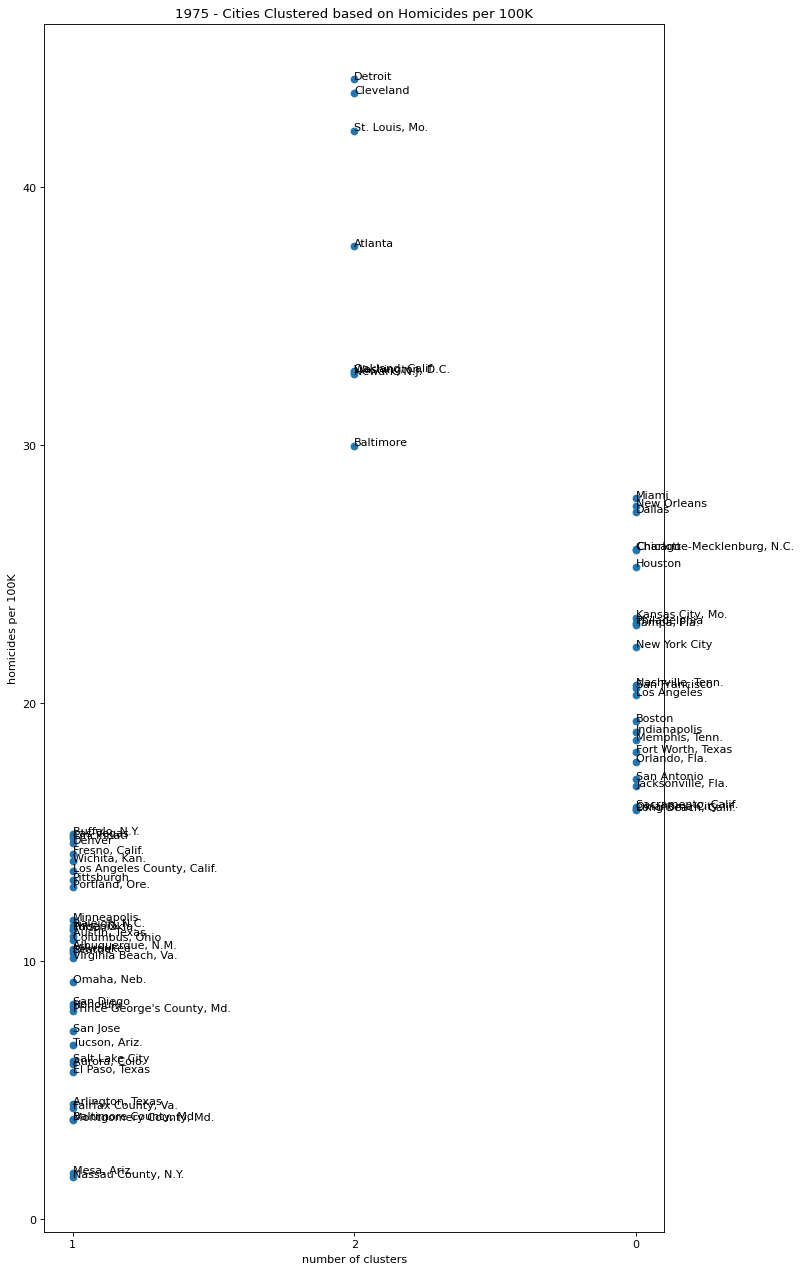

In [40]:
#1975 part 3
#converts the array to a DataFrame and saves it as a column in the crime_1975 DataFrame

crime_1975['cluster_category'] = y_kmeans_1975 # COMMENT: This adds our labels as a new column back into the original dataframe with the department names
crime_1975.head(5)

import matplotlib.pyplot as plt
# COMMENT: This sets the width (currently 10) and height (currently 20) of the plot. Changing these dimensins is helpful to help make the labels more clear!
plt.figure(figsize=(10, 20), dpi=80)
# COMMENT: Treating the cluster categories as strings causes Matplotlib to treat them as categorical data instead of continuous data, which is what we want!
#makes a scatterplot of 'homs_per_100k' by 'cluster category'
plt.scatter(crime_1975['cluster_category'].astype(str), crime_1975['homs_per_100k'])
plt.title('1975 - Cities Clustered based on Homicides per 100K') 
plt.xlabel('number of clusters')
plt.ylabel('homicides per 100K') 

# COMMENT: These two lines label the points
for i, txt in enumerate(np.array(crime_1975['department_name'])):
    # COMMENT: Notice how the arguments in this line match the arguments in plt.scatter above
    plt.annotate(txt, (crime_1975['cluster_category'].astype(str).iloc[i], crime_1975['homs_per_100k'].iloc[i]))

# COMMENT: "Fill in the blanks" version of the point labelling code so that you can reuse it for other scatterplots/data
#     For other years (1995, 2014), you'll replace crime_1975 with the dataframe of the year you're working with
# for i, txt in enumerate(np.array(crime_1975['COLUMN THAT STORES ALL OF YOUR LABELS'])):
#     plt.annotate(txt, (FIRST ARGUMENT FROM CREATING THE SCATTERPLOT IN PLT.SCATTER ABOVE[i], SECOND ARGUMENT FROM CREATING THE SCATTERPLOT[i]))

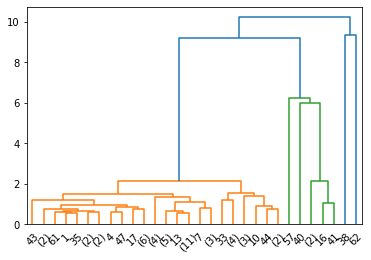

In [41]:
#1995  
#drops 'department_name and total_pop' column and produces a "linkage_matrix" and dendrogram from 1995 data
dncrime_1995 = crime_1995.drop(columns=['department_name','total_pop'])
Z_1995 = linkage(dncrime_1995, 'single')
dendrogram(Z_1995, truncate_mode='lastp')
plt.show()


In [42]:
#1995 part 2 
#creates a k-means clustering and outputs the fit() information (array) which is then saved as a variable. 

# COMMENT: Try not to run this code block more than once!
kmeans_1995 = KMeans(n_clusters=3)
y_kmeans_1995 = kmeans_1995.fit_predict(dncrime_1995) # COMMENT: This produces our cluster labels 

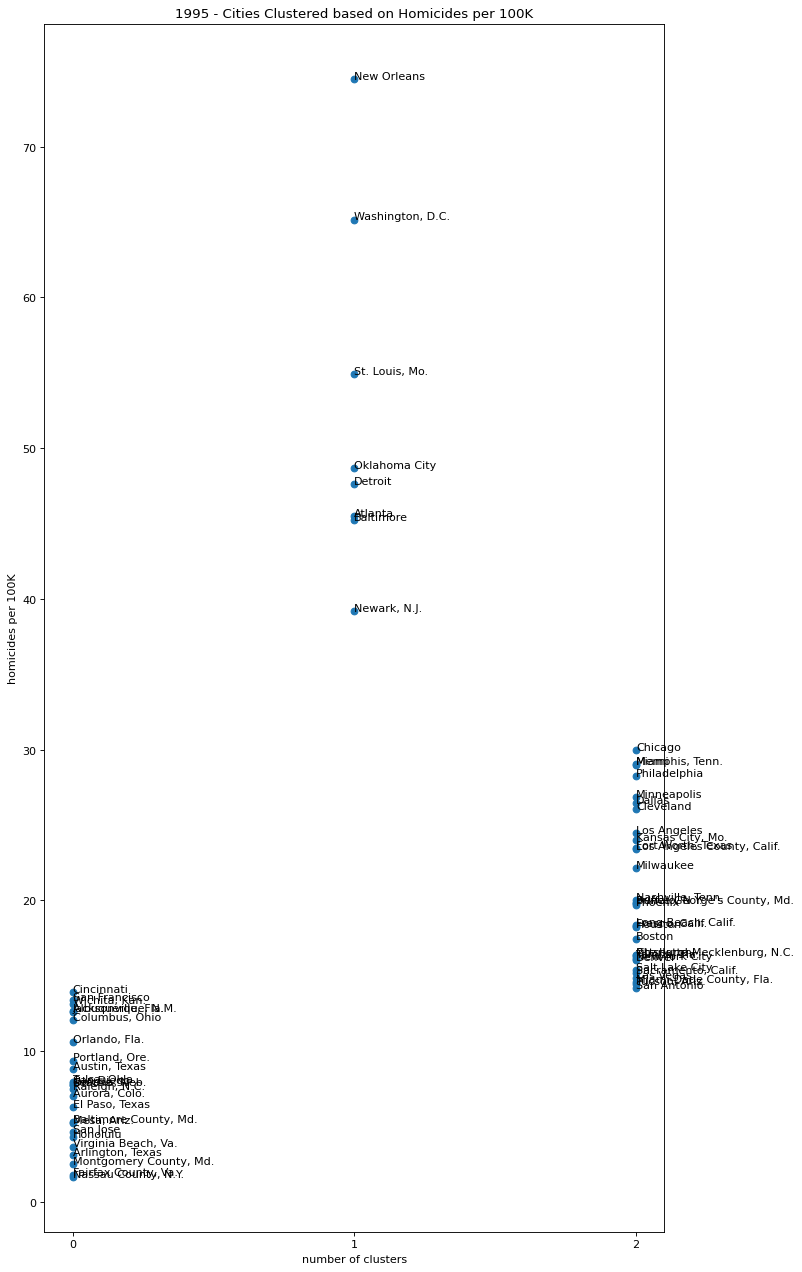

In [43]:
#1995 part 3
#converts the array to a DataFrame and saves it as a column in the crime_1975 DataFrame

import matplotlib.pyplot as plt
#crime_1995['cluster_category'] = pd.DataFrame(data = y_kmeans_1995) # COMMENT: This adds our labels as a new column back into the original dataframe with the department names
crime_1995['cluster_category'] = y_kmeans_1995
# COMMENT: This sets the width (currently 10) and height (currently 20) of the plot. Changing these dimensins is helpful to help make the labels more clear!
plt.figure(figsize=(10, 20), dpi=80)
# COMMENT: Treating the cluster categories as strings causes Matplotlib to treat them as categorical data instead of continuous data, which is what we want!
#makes a scatterplot of 'homs_per_100k' by 'cluster category'
plt.scatter(crime_1995['cluster_category'].astype(str), crime_1995['homs_per_100k'])
plt.title('1995 - Cities Clustered based on Homicides per 100K') 
plt.xlabel('number of clusters')
plt.ylabel('homicides per 100K')

# COMMENT: These two lines label the points
for i, txt in enumerate(np.array(crime_1995['department_name'])):
  # COMMENT: Notice how the arguments in this line match the arguments in plt.scatter above
  plt.annotate(txt, (crime_1995['cluster_category'].astype(str).iloc[i], crime_1995['homs_per_100k'].iloc[i]))

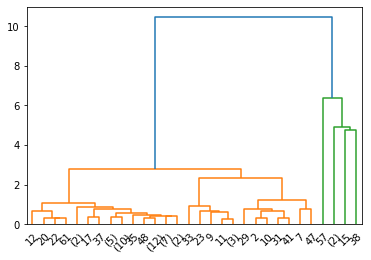

In [44]:
#2014 
#drops 'department_name and total_pop' column and produces a "linkage_matrix" and dendrogram from 1995 data
dncrime_2014 = crime_2014.drop(columns=['department_name','total_pop'])
Z_2014 = linkage(dncrime_2014, 'single')
dendrogram(Z_2014, truncate_mode='lastp')
plt.show()


In [45]:
#2014 part 2 
#creates a k-means clustering and outputs the fit() information (array) which is then saved as a variable. 

# COMMENT: Try not to run this code block more than once!
kmeans_2014 = KMeans(n_clusters=3)
y_kmeans_2014 = kmeans_2014.fit_predict(dncrime_2014) # COMMENT: This produces our cluster labels 

In [61]:
kmeans_2014

KMeans(n_clusters=3)

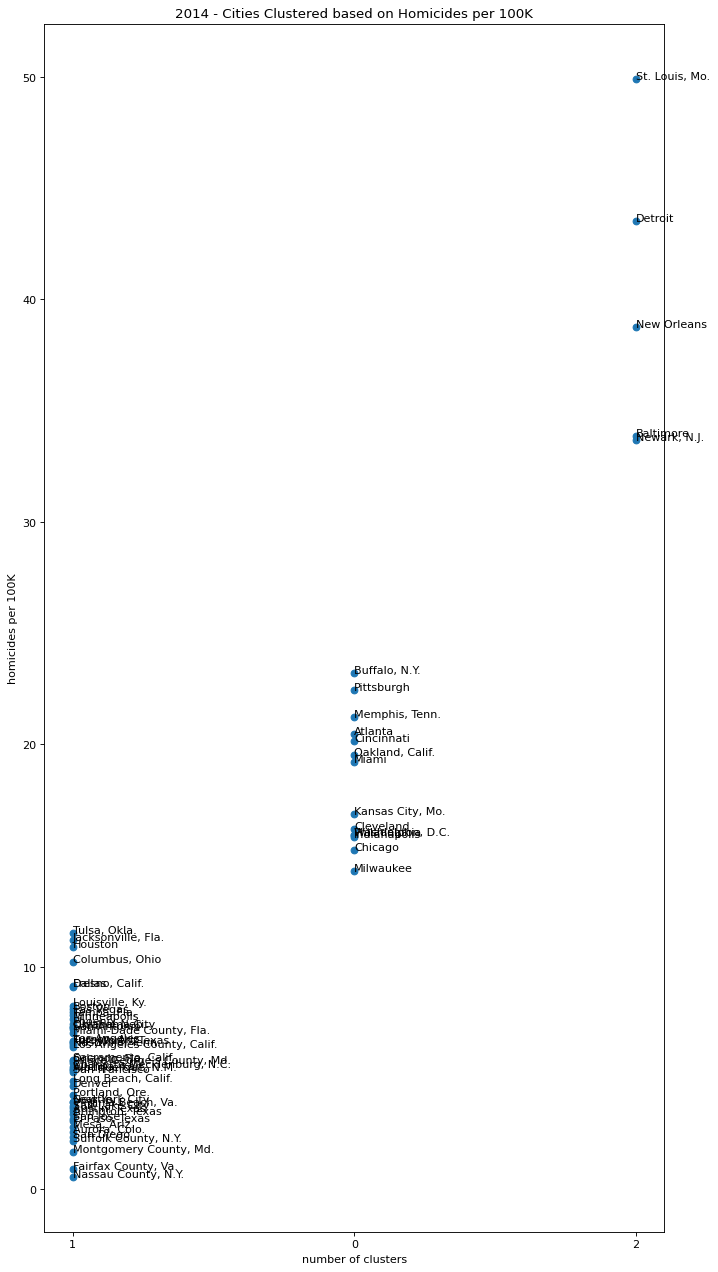

In [46]:
#2014 part 3
#converts the array to a DataFrame and saves it as a column in the crime_1975 DataFrame
import matplotlib.pyplot as plt
crime_2014['cluster_category'] = y_kmeans_2014  # COMMENT: This adds our labels as a new column back into the original dataframe with the department names
# COMMENT: This sets the width (currently 10) and height (currently 20) of the plot. Changing these dimensins is helpful to help make the labels more clear!
plt.figure(figsize=(10, 20), dpi=80)
# COMMENT: Treating the cluster categories as strings causes Matplotlib to treat them as categorical data instead of continuous data, which is what we want!
#makes a scatterplot of `homs_per_100k` by `cluster category
plt.scatter(crime_2014['cluster_category'].astype(str), crime_2014['homs_per_100k'])
plt.title('2014 - Cities Clustered based on Homicides per 100K') 
plt.xlabel('number of clusters')
plt.ylabel('homicides per 100K')  

# COMMENT: These two lines label the points
for i, txt in enumerate(np.array(crime_2014['department_name'])):
  # COMMENT: Notice how the arguments in this line match the arguments in plt.scatter above
  plt.annotate(txt, (crime_2014['cluster_category'].astype(str).iloc[i], crime_2014['homs_per_100k'].iloc[i]))

## **Visualizations and Statistics**

In [47]:
# add new column 'group' to each crime dataframe using data from cluster_category
crime_1975['group'] = crime_1975.apply(lambda row: 'high' if (int(row['cluster_category']) == 1) else ('low' if (int(row['cluster_category']) == 2) else 'mid'),axis =1)
crime_1995['group'] = crime_1995.apply(lambda row: 'high' if (int(row['cluster_category']) == 2) else ('low' if (int(row['cluster_category']) == 1) else 'mid'),axis =1)
crime_2014['group'] = crime_2014.apply(lambda row: 'high' if (int(row['cluster_category']) == 1) else ('low' if (int(row['cluster_category']) == 0) else 'mid'),axis =1)


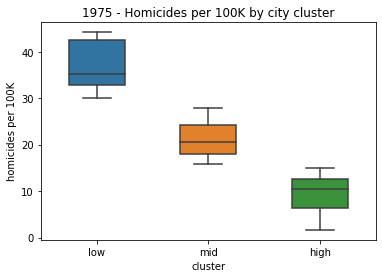

In [48]:
# Creates a boxplot between 'homicides per 100k' and 'group' for 1975 data
plot_1975 = sns.boxplot(y='homs_per_100k', x='group', data=crime_1975, width=0.5,order=["low", "mid", "high"]).set(title='1975 - Homicides per 100K by city cluster', xlabel='cluster', ylabel='homicides per 100K')

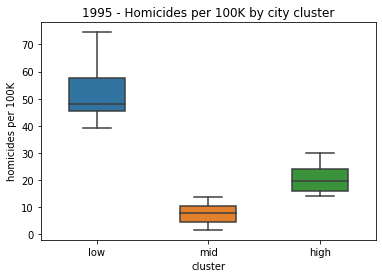

In [49]:
# Creates a boxplot between 'homicides per 100k' and 'group' for 1995 data 
plot_1995 = sns.boxplot(y='homs_per_100k', x='group', data=crime_1995, width=0.5,order=["low", "mid", "high"]).set(title='1995 - Homicides per 100K by city cluster', xlabel='cluster', ylabel='homicides per 100K')

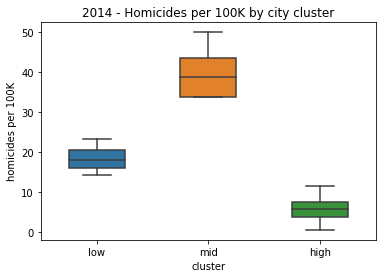

In [50]:
# Creates a boxplot between 'homicides per 100k' and 'group' for 2014 data
plot_2014 = sns.boxplot(y='homs_per_100k', x='group', data=crime_2014, width=0.5,order=["low", "mid", "high"]).set(title='2014 - Homicides per 100K by city cluster', xlabel='cluster', ylabel='homicides per 100K')

In [51]:
# Creates a table showing the three different clusters (low, mid, high) and the corrosponding cities and crime data in 1975
for cluster in range(3):
    print('cluster: ', cluster)
    print(crime_1975[crime_1975['cluster_category'] == cluster])

cluster:  0
                department_name  homs_per_100k  total_pop  cluster_category  \
7                        Boston      19.314419   616120.0                 0   
9   Charlotte-Mecklenburg, N.C.      25.943999   262103.0                 0   
10                      Chicago      25.968254  3150000.0                 0   
14                       Dallas      27.409459   864665.0                 0   
19            Fort Worth, Texas      18.097174   381275.0                 0   
22                      Houston      25.285242  1372342.0                 0   
23                 Indianapolis      18.871260   503411.0                 0   
24           Jacksonville, Fla.      16.765170   542792.0                 0   
25             Kansas City, Mo.      23.308403   489094.0                 0   
27           Long Beach, Calif.      15.847023   340758.0                 0   
28                  Los Angeles      20.293947  2729878.0                 0   
30               Memphis, Tenn.      18.

In [52]:
# Creates a table showing the three different clusters (low, mid, high) and the corrosponding cities and crime data in 1995
for cluster in range(3):
    print('cluster: ', cluster)
    print(crime_1995[crime_1995['cluster_category'] == cluster])

cluster:  0
             department_name  homs_per_100k  total_pop  cluster_category group
1312       Albuquerque, N.M.      12.627646   419714.0                 0   mid
1313        Arlington, Texas       3.078776   292324.0                 0   mid
1315           Aurora, Colo.       7.005063   256957.0                 0   mid
1316           Austin, Texas       8.783806   523691.0                 0   mid
1318   Baltimore County, Md.       5.300570   716904.0                 0   mid
1323              Cincinnati      13.898579   359749.0                 0   mid
1325          Columbus, Ohio      12.055191   638729.0                 0   mid
1329          El Paso, Texas       6.268902   590215.0                 0   mid
1330     Fairfax County, Va.       1.751224   856544.0                 0   mid
1333                Honolulu       4.316877   880266.0                 0   mid
1335      Jacksonville, Fla.      12.662925   679148.0                 0   mid
1342             Mesa, Ariz.       5.236

In [53]:
# Creates a table showing the three different clusters (low, mid, high) and the corrosponding cities and crime data in 2014
for cluster in range(3):
    print('cluster: ', cluster)
    print(crime_2014[crime_2014['cluster_category'] == cluster])

cluster:  0
       department_name  homs_per_100k  total_pop  cluster_category group
2576           Atlanta      20.468216   454363.0                 0   low
2581     Buffalo, N.Y.      23.218107   258419.0                 0   low
2583           Chicago      15.234272  2724121.0                 0   low
2584        Cincinnati      20.156481   297671.0                 0   low
2585         Cleveland      16.209749   388655.0                 0   low
2595      Indianapolis      15.846420   858238.0                 0   low
2597  Kansas City, Mo.      16.865314   468417.0                 0   low
2603    Memphis, Tenn.      21.223901   654922.0                 0   low
2605             Miami      19.194495   421996.0                 0   low
2607         Milwaukee      14.324404   600374.0                 0   low
2615   Oakland, Calif.      19.512481   409994.0                 0   low
2619      Philadelphia      15.907000  1559062.0                 0   low
2621        Pittsburgh      22.430782  

In [54]:
# 1975 Summary Statistics
# Groups by 'group' and creates 1975 summary statistics
crime_1975.groupby(by='group').describe()

homs_per_100k                                                        \
              count       mean       std        min        25%        50%   
group                                                                       
high           34.0   9.432366  3.919065   1.635730   6.272026  10.353890   
low             8.0  37.014657  5.672419  29.973383  32.800260  35.287449   
mid            23.0  21.191791  4.044201  15.847023  17.912563  20.597722   

                            total_pop                ...             \
             75%        max     count          mean  ...        75%   
group                                                ...              
high   12.546745  14.919152      34.0  4.409364e+05  ...  564430.75   
low    42.544678  44.190209       8.0  6.803088e+05  ...  753025.00   
mid    24.296823  27.940766      23.0  1.090104e+06  ...  816739.50   

                 cluster_category                                     
             max            count mean  std  min  25%  50%  75%  max  
group                                                                 
high   1100426.0             34.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
low    1432444.0              8.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
mid    7422506.0             23.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 24 columns]

In [55]:
# 1995 Summary Statistics
# Groups by 'group' and creates 1995 summary statistics
crime_1995.groupby(by='group').describe()

homs_per_100k                                                         \
              count       mean        std        min        25%        50%   
group                                                                        
high           31.0  20.467888   5.054281  14.201420  16.146863  19.710677   
low             8.0  52.603431  11.758791  39.195795  45.432808  48.158474   
mid            25.0   7.629988   3.832820   1.657878   4.618124   7.742774   

                            total_pop                ...              \
             75%        max     count          mean  ...         75%   
group                                                ...               
high   24.254460  29.965696      31.0  1.023273e+06  ...  1020994.00   
low    57.483317  74.510601       8.0  5.316139e+05  ...   593552.25   
mid    10.576179  13.898579      25.0  5.583771e+05  ...   738371.00   

                 cluster_category                                     
             max            count mean  std  min  25%  50%  75%  max  
group                                                                 
high   7319546.0             31.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
low     997297.0              8.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
mid    1157771.0             25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 24 columns]

In [56]:
# 2014 summary Statistics
# Groups by 'group' and creates 2014 summary statistics
crime_2014.groupby(by='group').describe()

homs_per_100k                                                        \
              count       mean       std        min        25%        50%   
group                                                                       
high           46.0   5.762328  2.692662   0.565411   3.671281   5.734147   
low            14.0  18.323389  2.897983  14.324404  15.914205  18.029905   
mid             5.0  39.940074  6.893258  33.678478  33.840513  38.748376   

                            total_pop                ...              \
             75%        max     count          mean  ...         75%   
group                                                ...               
high    7.413323  11.512779      46.0  1.026335e+06  ...  1091568.75   
low    20.390282  23.218107      14.0  7.187670e+05  ...   657900.25   
mid    43.523092  49.909911       5.0  4.586008e+05  ...   623513.00   

                 cluster_category                                     
             max            count mean  std  min  25%  50%  75%  max  
group                                                                 
high   8473938.0             46.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
low    2724121.0             14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mid     684694.0              5.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  

[3 rows x 24 columns]

In [57]:
# creates empty dataframe called homicides_each_year
homicides_each_year = pd.DataFrame({'department_name' : []})

# creates an arrays of the cities sampled for each year studied.
cities_1975 ={row['department_name'] for index,row in crime_1975.iterrows()}  
cities_1995 ={row['department_name'] for index,row in crime_1995.iterrows()} 
cities_2014 ={row['department_name'] for index,row in crime_2014.iterrows()}

# combines all three arrays of cities into one.
cities = cities_1975.union(cities_1995).union(cities_2014) 

# Iterates through cities array and creates new column, 'department_name', in homicides_each_year for each unique name.
homicides_each_year['department_name'] =  [name for name in cities] 

# function that creates a dictionary based on df with key=department name and value= (low, mid, or high) 
def make_dict(df): 
  dict_temp ={}
  for index, row in df.iterrows(): 
    dict_temp[row['department_name']] = row['group'] 
  return dict_temp 

# creates three dictionaries with crime data (crime_1975, crime_1995, crime_2014) using make_dict function.
group_dict_1975 = make_dict(crime_1975) 
group_dict_1995 = make_dict(crime_1995) 
group_dict_2014 = make_dict(crime_2014)

# populates homicides_each_year with data from group_dict_1975, group_dict_1995, group_dict_2014
homicides_each_year['group_1975'] = homicides_each_year.apply(lambda row: group_dict_1975[row['department_name']] if (row['department_name'] in cities_1975) else 'NaN',axis =1)
homicides_each_year['group_1995'] = homicides_each_year.apply(lambda row: group_dict_1995[row['department_name']] if (row['department_name'] in cities_1995) else 'NaN',axis =1)
homicides_each_year['group_2014'] = homicides_each_year.apply(lambda row: group_dict_2014[row['department_name']] if (row['department_name'] in cities_2014) else 'NaN',axis =1)

#cities that have not stayed in the same group year after year (aka have changed in at least on year)
changed_cities_lst = [ row['department_name'] for index, row in homicides_each_year.iterrows() if (((row['group_1975'] == row['group_1995']) and (row['group_1975'] == row['group_2014'])) == False)] 
changed_cities_lst

['Chicago',
 'Charlotte-Mecklenburg, N.C.',
 'Omaha, Neb.',
 'Austin, Texas',
 'Tampa, Fla.',
 'Oklahoma City',
 'Columbus, Ohio',
 'Buffalo, N.Y.',
 'Aurora, Colo.',
 'San Diego',
 'Indianapolis',
 'Dallas',
 'Fort Worth, Texas',
 'Albuquerque, N.M.',
 'Detroit',
 'Houston',
 'Fairfax County, Va.',
 'Long Beach, Calif.',
 'Nassau County, N.Y.',
 'Newark, N.J.',
 'Memphis, Tenn.',
 'Virginia Beach, Va.',
 'Oakland, Calif.',
 'San Jose',
 'Seattle',
 'New York City',
 'Boston',
 'Raleigh, N.C.',
 'Baltimore',
 'San Antonio',
 'Mesa, Ariz.',
 'Montgomery County, Md.',
 'Sacramento, Calif.',
 'Wichita, Kan.',
 'New Orleans',
 'Cleveland',
 'Honolulu',
 'Portland, Ore.',
 'Kansas City, Mo.',
 'Milwaukee',
 'Suffolk County, N.Y.',
 'Philadelphia',
 'St. Louis, Mo.',
 'Jacksonville, Fla.',
 'Los Angeles',
 'Orlando, Fla.',
 'San Francisco',
 'Arlington, Texas',
 'Miami-Dade County, Fla.',
 'Baltimore County, Md.',
 'El Paso, Texas',
 'Miami',
 'Nashville, Tenn.',
 'Pittsburgh',
 'Tulsa, Okla

In [58]:
# Creates table based on department_name and shows change in crime group (low, mid, high) over 1975, 1995, and 2014
changed_cities_df = homicides_each_year[homicides_each_year['department_name'].isin(changed_cities_lst)] 
changed_cities_df

,department_name,group_1975,group_1995,group_2014
0,Chicago,mid,high,low
1,"Charlotte-Mecklenburg, N.C.",mid,high,high
2,"Omaha, Neb.",high,mid,high
3,"Austin, Texas",high,mid,high
5,"Tampa, Fla.",mid,high,high
7,Oklahoma City,mid,low,high
8,"Columbus, Ohio",high,mid,high
9,"Buffalo, N.Y.",high,high,low
10,"Aurora, Colo.",high,mid,high
11,San Diego,high,mid,high


In [59]:
#to create the bubble visualizations in tableau we needed to export data(making sure we had department name, cluster category, and homicide per 100k)
#all of this data is contained in our previously created crime_"year" dataframes 
from google.colab import files

crime_1975.to_csv('1975.csv') #the lines below export our dataframes as csv files and downloads them 
files.download('1975.csv') 

crime_1975.to_csv('1975.csv')
files.download('1975.csv')

crime_2014.to_csv('2014.csv')
files.download('2014.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>